In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
table_path = '/stor/work/Lambowitz/ref/hg19/genome'
tablename = table_path + '/k562_rbp.tsv'
df = pd.read_table(tablename, sep='\t', 
              names = ['peak_id', 'rbp', 'log_fc', 'log10p']) \
    .assign(rbp = lambda d: d.rbp.str.split('_',expand=True).iloc[:,0]) \
    .groupby(['peak_id', 'rbp'], as_index=False)\
    .mean() \
    .pipe(lambda d: d[d['log10p'] > 2])\
    .pipe(pd.pivot_table, columns = 'rbp', index='peak_id', values='log_fc') \
    .fillna(0)
df.head()

rbp,AARS,AGGF1,AKAP8L,AUH,BUD13,CPSF6,CSTF2T,DDX24,DDX3X,DDX42,...,U2AF1,U2AF2,UCHL5,UPF1,XRCC6,XRN2,YBX3,YWHAG,ZNF622,ZRANB2
peak_id,,,,,,,,,,,,,,,,,,,,,
chr10:100003840-100004000:+,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.513674,0.000000,0.0,0.0,0.0,0.0,3.37342,0.0
chr10:100004232-100004447:+,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,3.331379,0.0,0.0,0.0,0.0,0.00000,0.0
chr10:100154981-100155021:-,5.052897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
chr10:100176806-100176919:-,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
chr10:100176928-100177087:-,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0


In [36]:
cor_df = df.corr(method='spearman')

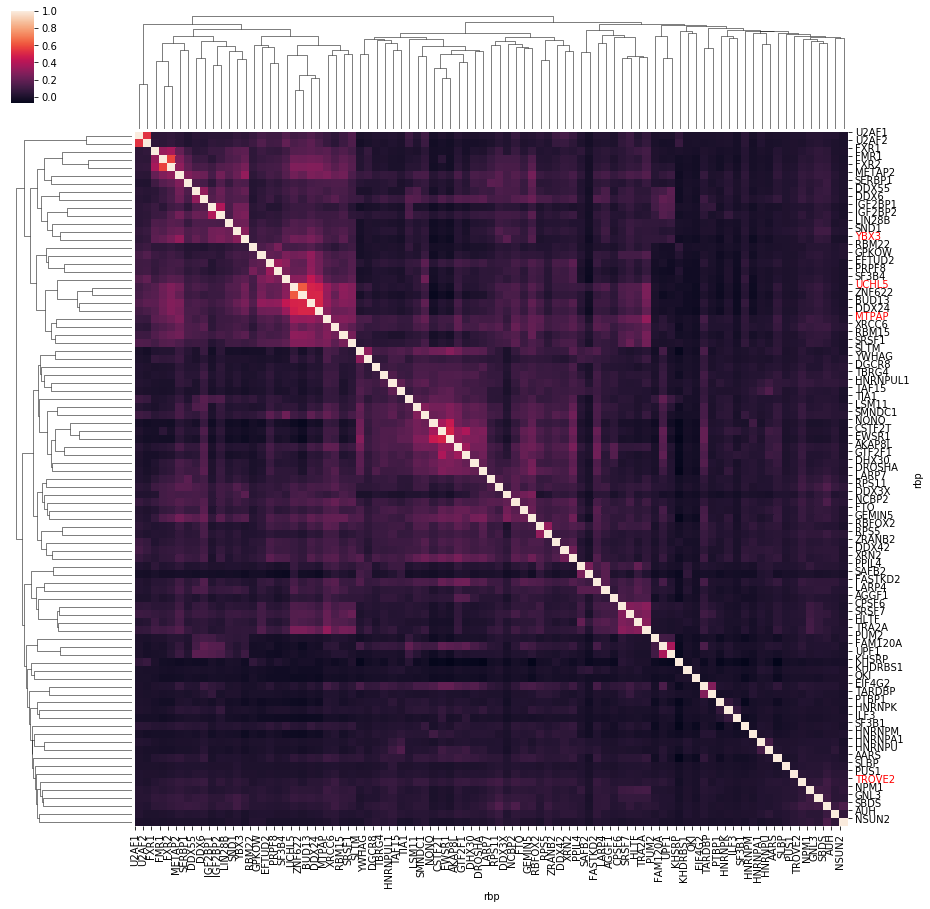

In [47]:
p = sns.clustermap(cor_df, figsize=(15,15))
ax = p.ax_heatmap
ax.set_xticks(range(0, cor_df.shape[0]))
ax.set_yticks(range(0, cor_df.shape[1]))
xt = ax.set_xticklabels(cor_df.columns[p.dendrogram_col.reordered_ind])
yt = ax.set_yticklabels(cor_df.columns[p.dendrogram_row.reordered_ind])

for yt in ax.get_ymajorticklabels():
    if yt.get_text() in ['YBX3','TROVE2','UCHL5','MTPAP']:
        yt.set_color('red')